Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')#, force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                               label_mode='categorical', #### converts to one-hot
                                                               batch_size = batch_size,
                                                               image_size = (img_height,img_width),
                                                               subset="training",  ########
                                                               validation_split=0.2, 
                                                               seed=123)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, 
                                                               label_mode='categorical', ####
                                                               batch_size = batch_size,
                                                               image_size = (img_height,img_width),
                                                               subset="validation", #######
                                                               validation_split=0.2, 
                                                               seed=123)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
print(type(train_ds))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

[<tf.Tensor: shape=(), dtype=int64, numpy=8>, <tf.Tensor: shape=(), dtype=int64, numpy=4>, <tf.Tensor: shape=(), dtype=int64, numpy=5>, <tf.Tensor: shape=(), dtype=int64, numpy=3>, <tf.Tensor: shape=(), dtype=int64, numpy=2>, <tf.Tensor: shape=(), dtype=int64, numpy=0>, <tf.Tensor: shape=(), dtype=int64, numpy=1>, <tf.Tensor: shape=(), dtype=int64, numpy=7>, <tf.Tensor: shape=(), dtype=int64, numpy=6>]


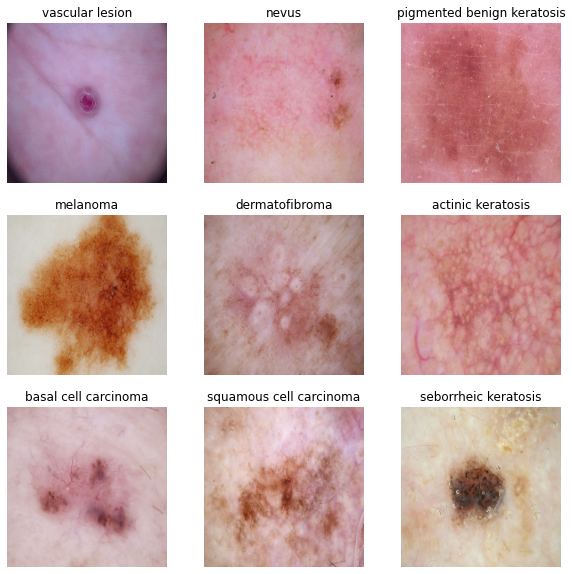

In [ ]:
import matplotlib.pyplot as plt

num_classes = len(class_names)

fig = plt.figure(figsize=(10,10))

i = 0
dedup = [] 
for images,labels in train_ds.take(3):   ### take(n) selects n*batach_size examples, 3 to make sure all classes plotted
  for j in range(len(images)):
    # ind = labels[j].numpy()
    ind = tf.argmax(labels[j], axis=0)  ## convert one-hot to int
    if ind not in dedup:
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[j].numpy().astype("uint8"))
      plt.title(class_names[ind])
      plt.axis("off")
      dedup.append(ind)
      i=i+1

print(dedup)
plt.show()

# train_ds.take(n)
# [ n , ([batch, 180, 180, 3], [batch, 9] ) ]


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here


model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(scale = 1./255,
                 input_shape= (img_height,img_width,3)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_17 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
activation_63 (Activation)   (None, 180, 180, 64)      0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 180, 180, 64)      256       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 178, 178, 64)      36928     
_________________________________________________________________
activation_64 (Activation)   (None, 178, 178, 64)      0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 178, 178, 64)    

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose = 2
)

Epoch 1/20
56/56 - 8s - loss: 28.4530 - accuracy: 0.3131 - val_loss: 47.5156 - val_accuracy: 0.0537
Epoch 2/20
56/56 - 7s - loss: 13.7373 - accuracy: 0.4068 - val_loss: 59.7428 - val_accuracy: 0.0537
Epoch 3/20
56/56 - 7s - loss: 8.3712 - accuracy: 0.4799 - val_loss: 27.9105 - val_accuracy: 0.0425
Epoch 4/20
56/56 - 7s - loss: 5.3534 - accuracy: 0.5017 - val_loss: 21.4666 - val_accuracy: 0.1275
Epoch 5/20
56/56 - 8s - loss: 3.7741 - accuracy: 0.5307 - val_loss: 18.8444 - val_accuracy: 0.1387
Epoch 6/20
56/56 - 8s - loss: 2.9441 - accuracy: 0.5575 - val_loss: 18.2553 - val_accuracy: 0.1588
Epoch 7/20
56/56 - 8s - loss: 2.6117 - accuracy: 0.5647 - val_loss: 5.3138 - val_accuracy: 0.3400
Epoch 8/20
56/56 - 8s - loss: 2.5104 - accuracy: 0.5837 - val_loss: 3.6466 - val_accuracy: 0.3893
Epoch 9/20
56/56 - 8s - loss: 2.6306 - accuracy: 0.6189 - val_loss: 4.4295 - val_accuracy: 0.3221
Epoch 10/20
56/56 - 8s - loss: 2.0913 - accuracy: 0.6602 - val_loss: 4.3423 - val_accuracy: 0.3132
Epoch 11/20

### Visualizing training results

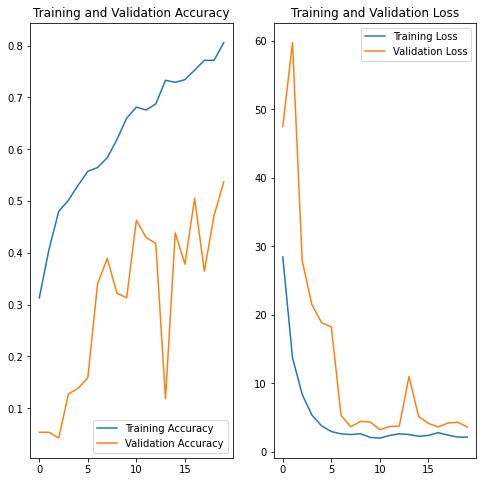

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##The model's training accuracy is 80% as compared to 53% validation accuracy. Hence, the its an overfit

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Rescaling

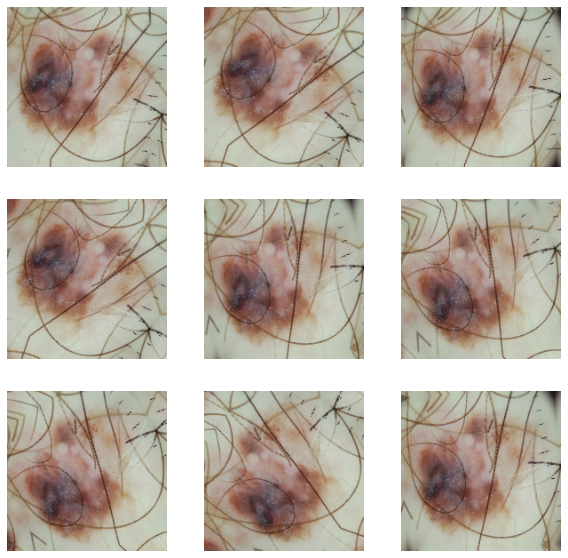

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

## https://www.tensorflow.org/tutorials/images/data_augmentation
for image_label_tuples_batch in train_ds.take(1).as_numpy_iterator():
  image = image_label_tuples_batch[0][0]
  break

data_augmentation = tf.keras.Sequential([
  Rescaling(scale = 1./255),
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
])

# Add the image to a batch
image = tf.expand_dims(image, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

plt.show()

In [ ]:
# for image_label_tuples_batch in train_ds.take(1).as_numpy_iterator():
#   image = image_label_tuples_batch[1]
#   break

# image.shape

(32, 9)

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

### Your code goes here


model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(scale = 1./255,
                 input_shape= (img_height,img_width,3)))
model.add(RandomFlip("horizontal_and_vertical"))
model.add(RandomRotation(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))


### Compiling the model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_18 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
random_flip_8 (RandomFlip)   (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation_8 (RandomRot (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 180, 180, 64)      1792      
_________________________________________________________________
activation_68 (Activation)   (None, 180, 180, 64)      0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 180, 180, 64)      256       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 178, 178, 64)    

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose = 2
)

Epoch 1/20
56/56 - 9s - loss: 29.8703 - accuracy: 0.3030 - val_loss: 43.7530 - val_accuracy: 0.0403
Epoch 2/20
56/56 - 8s - loss: 14.9768 - accuracy: 0.3198 - val_loss: 64.7634 - val_accuracy: 0.0380
Epoch 3/20
56/56 - 8s - loss: 9.2261 - accuracy: 0.4141 - val_loss: 41.7492 - val_accuracy: 0.1499
Epoch 4/20
56/56 - 8s - loss: 5.8411 - accuracy: 0.4118 - val_loss: 26.2007 - val_accuracy: 0.1342
Epoch 5/20
56/56 - 8s - loss: 4.0487 - accuracy: 0.4386 - val_loss: 29.9356 - val_accuracy: 0.1499
Epoch 6/20
56/56 - 8s - loss: 3.0903 - accuracy: 0.4475 - val_loss: 11.5465 - val_accuracy: 0.1969
Epoch 7/20
56/56 - 8s - loss: 2.8349 - accuracy: 0.4559 - val_loss: 7.3256 - val_accuracy: 0.2371
Epoch 8/20
56/56 - 8s - loss: 2.5529 - accuracy: 0.4448 - val_loss: 5.6485 - val_accuracy: 0.2953
Epoch 9/20
56/56 - 8s - loss: 2.2618 - accuracy: 0.4782 - val_loss: 6.8108 - val_accuracy: 0.2282
Epoch 10/20
56/56 - 8s - loss: 2.1914 - accuracy: 0.4743 - val_loss: 2.8076 - val_accuracy: 0.3848
Epoch 11/20

### Visualizing the results

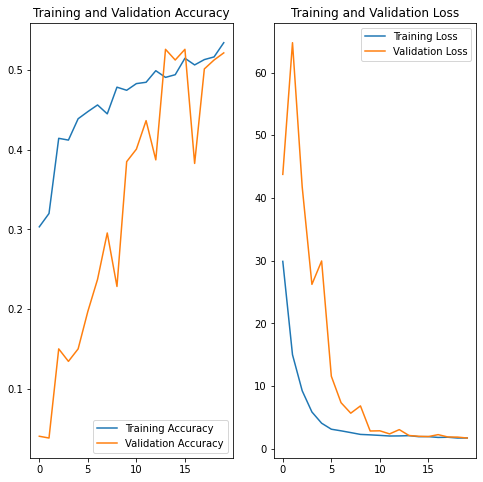

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##There is significant improvement in the model since the overfitting has reduced, both training and validation set have ~52% accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

56it [00:00, 4203.31it/s]


Counter({'pigmented benign keratosis': 462, 'melanoma': 438, 'basal cell carcinoma': 376, 'nevus': 357, 'squamous cell carcinoma': 181, 'vascular lesion': 139, 'actinic keratosis': 114, 'dermatofibroma': 95, 'seborrheic keratosis': 77})


<BarContainer object of 9 artists>

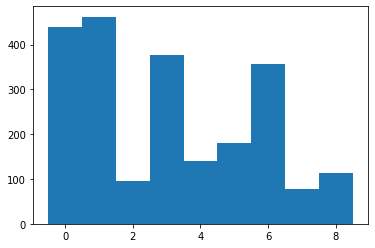

In [ ]:
import collections
cnt = collections.Counter()

# from tqdm import tqdm

# train_val_data = tf.data.Dataset.zip((train_ds, val_ds))  ## merge

for row in train_ds.map(lambda predictor, target: tf.argmax(target,axis=1)).as_numpy_iterator():  ## tf.argmax(target,axis=1) reverse one hot
  cnt.update([class_names[i] for i in row])

for row in val_ds.map(lambda predictor, target: tf.argmax(target,axis=1)).as_numpy_iterator():  
  cnt.update([class_names[i] for i in row])

print(cnt)

labels, values = zip(*cnt.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

#### **seborrheic keratosis - 77, has least samples in training set**

#### - Which classes dominate the data in terms proportionate number of samples?
#### **pigmented benign keratosis - 462, has most samples**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = "/content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
output_directory_path = "/content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/"


In [ ]:

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory = output_directory_path + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53697CFBD0>: 100%|██████████| 500/500 [00:22<00:00, 22.62 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53697CFF50>: 100%|██████████| 500/500 [00:21<00:00, 23.18 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5372952510>:   0%|          | 1/500 [00:00<01:41,  4.94 Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53729CE510>: 100%|██████████| 500/500 [00:23<00:00, 20.88 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F53697C1BD0>: 100%|██████████| 500/500 [01:58<00:00,  4.22 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/nevus.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F53697F0B10>: 100%|██████████| 500/500 [01:36<00:00,  5.20 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F5369728F10>:   0%|          | 1/500 [00:00<01:04,  7.78 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F536971DA50>: 100%|██████████| 500/500 [00:22<00:00, 22.47 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5372A604D0>: 100%|██████████| 500/500 [00:49<00:00, 10.18 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F53697FD090>:   0%|          | 1/500 [00:00<00:59,  8.35 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/squamous cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F53774FCF50>: 100%|██████████| 500/500 [00:22<00:00, 22.24 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/AugmentedTrain/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F537F3EE4D0>: 100%|██████████| 500/500 [00:27<00:00, 18.47 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
# image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
data_dir_aug = pathlib.Path(output_directory_path)
image_count_train = len(list(data_dir_aug.glob('*/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
# from glob import glob
# print(os.path.join(output_directory_path,'*' ,'*.jpg'))
# path_list = [x for x in glob(os.path.join(output_directory_path, '*', '*.jpg'))]
# path_list

In [ ]:
# lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [ ]:
# dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [ ]:
# new_df['Label'].value_counts()

In [ ]:
## nn
train_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(data_dir_aug, 
                                                               label_mode='categorical',
                                                               batch_size = batch_size,
                                                               image_size = (img_height,img_width),
                                                              #  subset="training",  
                                                              #  validation_split=0.2, 
                                                               seed=123)

Found 4500 files belonging to 9 classes.


In [ ]:
# merge
train_ds_augmented_merge = train_ds_augmented.concatenate(train_ds)
train_ds_augmented_merge = train_ds_augmented_merge.concatenate(val_ds)

#shuffle
# train_ds_augmented_merge.shuffle(buffer_size=1000, reshuffle_each_iteration=False)
train_ds_augmented_merge.shuffle(buffer_size=1000)

#train/val split
train_ds_new = train_ds_augmented_merge.take(int(0.8* len(train_ds_augmented_merge)))
val_ds_new = train_ds_augmented_merge.skip(int(0.8*len(train_ds_augmented_merge)))

print(len(train_ds_new),train_ds_new)
print(len(val_ds_new),val_ds_new)


168 <TakeDataset shapes: ((None, 180, 180, 3), (None, 9)), types: (tf.float32, tf.float32)>
43 <SkipDataset shapes: ((None, 180, 180, 3), (None, 9)), types: (tf.float32, tf.float32)>


In [ ]:
## optimisations, so that training and data reading are parallel
train_ds_new = train_ds_new.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_new = val_ds_new.cache().prefetch(buffer_size=AUTOTUNE)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
# data_dir_train="path to directory with training data + data created using augmentor"
# data_dir_aug

# data_dir_train_aug = pathlib.Path(["/content/gdrive/MyDrive/ms/CNN Assignment/data_todo_delete/Skin cancer ISIC The International Skin Imaging Collaboration/Train",output_directory_path])

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   directory = data_dir_train_aug,
#   seed=123,
#   validation_split = 0.2,
#   subset = "training",
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

#### **Todo:** Create a validation dataset

In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train_aug,
#   seed=123,
#   validation_split = 0.2,
#   subset = "validation"
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(scale = 1./255,
                 input_shape= (img_height,img_width,3)))
# model.add(RandomFlip("horizontal_and_vertical"))
# model.add(RandomRotation(0.2))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512)) ##model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 64)      1792      
_________________________________________________________________
activation_10 (Activation)   (None, 180, 180, 64)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 180, 180, 64)      256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 64)      36928     
_________________________________________________________________
activation_11 (Activation)   (None, 178, 178, 64)      0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 178, 178, 64)     

In [ ]:
epochs = 30

history = model.fit(
  train_ds_new,
  validation_data=val_ds_new,
  epochs=epochs,
  verbose = 2
)

Epoch 1/30
168/168 - 22s - loss: 6.1421 - accuracy: 0.3343 - val_loss: 42.7730 - val_accuracy: 0.1047
Epoch 2/30
168/168 - 21s - loss: 1.4473 - accuracy: 0.4443 - val_loss: 15.6878 - val_accuracy: 0.1956
Epoch 3/30
168/168 - 21s - loss: 1.2212 - accuracy: 0.5516 - val_loss: 10.1359 - val_accuracy: 0.3942
Epoch 4/30
168/168 - 21s - loss: 0.9637 - accuracy: 0.6463 - val_loss: 5.3202 - val_accuracy: 0.5011
Epoch 5/30
168/168 - 21s - loss: 0.8780 - accuracy: 0.6907 - val_loss: 5.8928 - val_accuracy: 0.2851
Epoch 6/30
168/168 - 21s - loss: 0.6398 - accuracy: 0.7623 - val_loss: 7.2607 - val_accuracy: 0.3455
Epoch 7/30
168/168 - 21s - loss: 0.5490 - accuracy: 0.7983 - val_loss: 1.1791 - val_accuracy: 0.6945
Epoch 8/30
168/168 - 21s - loss: 0.4075 - accuracy: 0.8468 - val_loss: 1.0857 - val_accuracy: 0.7156
Epoch 9/30
168/168 - 21s - loss: 0.3305 - accuracy: 0.8792 - val_loss: 1.2238 - val_accuracy: 0.7142
Epoch 10/30
168/168 - 21s - loss: 0.3178 - accuracy: 0.8855 - val_loss: 2.1827 - val_acc

#### **Todo:**  Visualize the model results

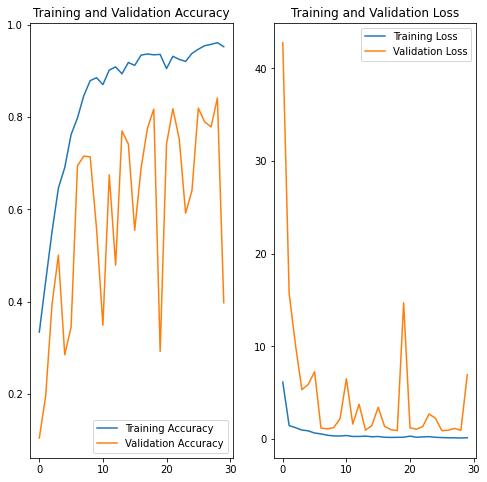

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, 
                                                               label_mode='categorical', #### converts to one-hot
                                                               batch_size = batch_size,
                                                               image_size = (img_height,img_width),
                                                               seed=123)
model.evaluate(test_ds)

Found 118 files belonging to 9 classes.
4/4 [==============================] - 3s 47ms/step - loss: 8.7744 - accuracy: 0.3136


[8.774378776550293, 0.31355932354927063]

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

## After balancing class skewness, validation accuracy is reaches upto 84% which much higher then both of the previous models. While in model 2, data augmentation resolved overfitting but accuracy was ~53%.
